In [7]:
import tensorflow_datasets as tfds
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow_datasets'

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tensorflow_datasets

     ---------------------------------------- 4.7/4.7 MB 1.2 MB/s eta 0:00:00
     -------------------------------------- 140.1/140.1 kB 1.7 MB/s eta 0:00:00
     -------------------------------------- 52.3/52.3 kB 894.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 218.0/218.0 kB 2.2 MB/s eta 0:00:00
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21486 sha256=ef2187251c00e87bf150af33afeaacfeba50665073244da8139fb374ba0fbcce
  Stored in directory: c:\users\tusha\appdata\local\pip\cache\wheels\e1\e8\83\ddea66100678d139b14bc87692ece57c6a2a937956d2532608
Successfully built promise
Note: you may need to restart the kernel to use updated packages.


In [6]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [7]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\tusha\tensorflow_datasets\imdb_reviews\subwords8k\1.0.0.incompleteJEH9O7\imdb_reviews-train…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\tusha\tensorflow_datasets\imdb_reviews\subwords8k\1.0.0.incompleteJEH9O7\imdb_reviews-test.…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\tusha\tensorflow_datasets\imdb_reviews\subwords8k\1.0.0.incompleteJEH9O7\imdb_reviews-unsup…

Dataset imdb_reviews downloaded and prepared to C:\Users\tusha\tensorflow_datasets\imdb_reviews\subwords8k\1.0.0. Subsequent calls will reuse this data.


In [9]:
train_examples_batch, train_labels_batch = next(iter(train_dataset))
print(train_examples_batch)
print(train_labels_batch)

tf.Tensor(
[  62   18   41  604  927   65    3  644 7968   21   35 5096   36   11
   43 2948 5240  102   50  681 7862 1244    3 3266   29  122  640    2
   26   14  279  438   35   79  349  384   11 1991    3  492   79  122
  188  117   33 4047 4531   14   65 7968    8 1819 3947    3   62   27
    9   41  577 5044 2629 2552 7193 7961 3642    3   19  107 3903  225
   85  198   72    1 1512  738 2347  102 6245    8   85  308   79 6936
 7961   23 4981 8044    3 6429 7961 1141 1335 1848 4848   55 3601 4217
 8050    2    5   59 3831 1484 8040 7974  174 5773   22 5240  102   18
  247   26    4 3903 1612 3902  291   11    4   27   13   18 4092 4008
 7961    6  119  213 2774    3   12  258 2306   13   91   29  171   52
  229    2 1245 5790  995 7968    8   52 2948 5240 8039 7968    8   74
 1249    3   12  117 2438 1369  192   39 7975], shape=(163,), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)


In [10]:
encoder = info.features['text'].encoder
print('Vocabulary size: {}'.format(encoder.vocab_size))

Vocabulary size: 8185


In [11]:
sample_string = 'Hello I am Tushar.'

encoded_string = encoder.encode(sample_string)
print('Encoded string is {}'.format(encoded_string))

original_string = encoder.decode(encoded_string)
print('The original string: "{}"'.format(original_string))

Encoded string is [4025, 222, 12, 258, 1678, 2682, 7975]
The original string: "Hello I am Tushar."


In [12]:
assert original_string == sample_string
for index in encoded_string:
  print('{} ----> {}'.format(index, encoder.decode([index])))

4025 ----> Hell
222 ----> o 
12 ----> I 
258 ----> am 
1678 ----> Tu
2682 ----> shar
7975 ----> .


In [13]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE)

test_dataset = test_dataset.padded_batch(BATCH_SIZE)

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(1e-4),
              metrics = ['accuracy'])

In [16]:
history = model.fit(train_dataset, epochs = 10, validation_data = test_dataset, validation_steps = 30)

Epoch 1/10
391/391 [==============================] - 1352s 3s/step - loss: 0.6801 - accuracy: 0.5168 - val_loss: 0.5970 - val_accuracy: 0.6109
Epoch 2/10
391/391 [==============================] - 1324s 3s/step - loss: 0.4041 - accuracy: 0.8117 - val_loss: 0.4960 - val_accuracy: 0.7359
Epoch 3/10
391/391 [==============================] - 1319s 3s/step - loss: 0.2788 - accuracy: 0.8870 - val_loss: 0.3429 - val_accuracy: 0.8526
Epoch 4/10
391/391 [==============================] - 1200s 3s/step - loss: 0.2271 - accuracy: 0.9149 - val_loss: 0.3277 - val_accuracy: 0.8651
Epoch 5/10
391/391 [==============================] - 1185s 3s/step - loss: 0.1929 - accuracy: 0.9292 - val_loss: 0.3479 - val_accuracy: 0.8719
Epoch 6/10
391/391 [==============================] - 1241s 3s/step - loss: 0.1809 - accuracy: 0.9364 - val_loss: 0.3844 - val_accuracy: 0.8708
Epoch 7/10
391/391 [==============================] - 1189s 3s/step - loss: 0.1557 - accuracy: 0.9465 - val_loss: 0.3719 - val_accuracy:

In [17]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/391 [==============================] - 116s 297ms/step - loss: 0.4374 - accuracy: 0.8620
Test Loss: 0.4374268651008606
Test Accuracy: 0.8620399832725525


In [18]:
def pad_to_size(vec, size):
  zeros = [0] * (size - len(vec))
  vec.extend(zeros)
  return vec

In [19]:
def sample_predict(sample_pred_text, pad):
  encoded_sample_pred_text = encoder.encode(sample_pred_text)

  if pad:
    encoded_sample_pred_text = pad_to_size(encoded_sample_pred_text, 64)
  encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
  predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))
  print("Prediction Score: ", predictions)
  
  output = ""
  if predictions[0][0] >= 0.5: output = "POSITIVE"
  elif predictions[0][0] <= -1: output = "NEGATIVE"
  else: output = "NEUTRAL"

  return output

In [28]:
sample_pred_text = ('TThe movie was cool. The animation and the graphics were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text, pad = False)
print(predictions)

1/1 [==============================] - 0s 19ms/step
Prediction Score:  [[0.5140165]]
POSITIVE


In [25]:
sample_pred_text = ('The movie was cool. The animation and the graphics were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text, pad = False)
print(predictions)

1/1 [==============================] - 0s 18ms/step
Prediction Score:  [[0.35158187]]
NEUTRAL


In [26]:
sample_pred_text = ('The movie was cool. The animation and the graphics were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text, pad = False)
print(predictions)

1/1 [==============================] - 0s 18ms/step
Prediction Score:  [[0.35158187]]
NEUTRAL


In [27]:
sample_pred_text = ('This movie is awesome. The acting was incredicable. Highly recommend')
predictions = sample_predict(sample_pred_text, pad = False)
print(predictions)

1/1 [==============================] - 0s 20ms/step
Prediction Score:  [[1.4470558]]
POSITIVE


In [29]:
sample_pred_text = ("""Overrated Sequel, But Still Good, But Violent! Beloved characters die, a character gets their head cut off, someone falls off a cliff, 
stabbings, punching, shooting, and more. The characters swear a bit. Even Captain America does! Role models include, Captain America, Iron Man, Hulk, AntMan, 
Black Widow, Hawkeye. Thor not so much because he SPOILER ALERT: got fat and played Fortnite the entire 5 year period. He was funny, but you may not want your 
kid wanting to say 'I want to be like the God of Thunder and play fortnite all day'. Characters did kiss. Thor drank a lot of beer. Captain America proved 
himself of something but not saying what. With reviewing the movie, the first half hour was good, then the next half hour was slow. The second half hour was 
pretty good, but the last hour was epic. From just starting out with Iron Man, Cap, Thor, and Hulk, to this amazing fight scene at the end, Avengers Endgame 
really pulled it off. Overall, pretty good for families and a good finale for the Infinity Saga.""")

predictions = sample_predict(sample_pred_text, pad = False)
print(predictions)

1/1 [==============================] - 0s 24ms/step
Prediction Score:  [[-1.164781]]
NEGATIVE


In [30]:
sample_pred_text = (""" If a business’s goal is to increase brand recognition, 
social media may be a useful marketing tool.   For example, Old Spice launched a viral campaign, including videos on YouTube in response to followers’
tweets on Twitter (“Old Spice Case Study,” 2010).  As a result, the Old Spice channel on YouTube was the most viewed among sponsored channels 
(Ad Age, as cited in “Old Space Case Study,” 2010).  If the desired outcome was to increase the public’s familiarity with the Old Spice brand name and it products, then the social media usage achieved that goal. .""")

predictions = sample_predict(sample_pred_text, pad = False)
print(predictions)

1/1 [==============================] - 0s 24ms/step
Prediction Score:  [[4.679124]]
POSITIVE


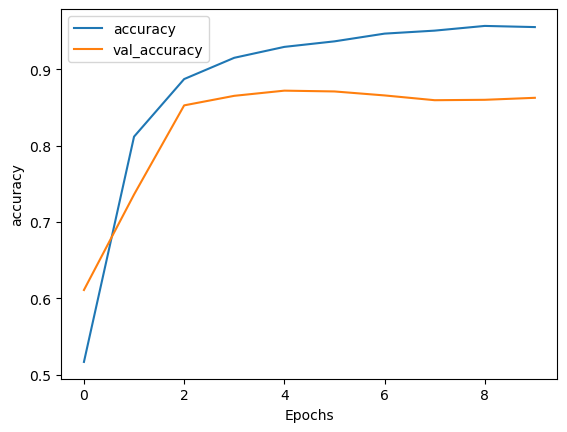

In [31]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

plot_graphs(history, 'accuracy')